# Импорт

https://colab.research.google.com/drive/1nbjfRvIN1ganmpa5FcsWV6BQfhjKTEPE?usp=sharing#scrollTo=PeWNrMvmRVjG

In [1]:
from sklearn.metrics import *
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from Classes.TFiDF import TFiDF
from Classes.KNumNeighborsClassifier import KNumNeighborsClassifier
from Classes.KNumNeighborsTeacher import KNumNeighborsTeacher
from Classes.KMeanClastinatorTrain import KMeanClastinatorTrain
from Functions.functions_of_priority import max_count_class
from Functions.distance_functions import euclid_distance
from Classes.PCA import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from random import choice
from scipy.linalg import eigh
import pandas as pd
import spacy
import re
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def clastering_classification_result(yt, yp):
    print('Accuracy')
    print(accuracy_score(yt, yp))
    print(accuracy_score(abs(yt-1), yp))
    print('Confusion matrix')
    print(confusion_matrix(yt, yp))
    print(confusion_matrix(abs(yt-1), yp))
    print('Precision, Recall, F\n', classification_report(yt, yp))
    print('Precision, Recall, F\n', classification_report(abs(yt-1), yp))
    fpr, tpr, thresholds = roc_curve(yp, yt)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    display.plot()
    fpr, tpr, thresholds = roc_curve(abs(yt-1), yp)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    display.plot()


# Test text

In [3]:
train_texts = ["Великолепный сериал, который поможет успокоить нервы при любых стрессах и просто скрасит серые будни",
               "Пожалуй, если бы я посмотрел только первые пару сезонов этого сериала, я бы с легкой руки написал ему положительную рецензию"]
test_texts = ["В общем, если создатели этого сериала не вернут всё на круги своя, то рейтинги следующих сезонов будут становится все ниже и ниже, а зрительская аудитория будет все меньше и меньше."]


In [4]:
test_words = []
for text in test_texts + train_texts:
    test_words.append(np.array(re.sub(r'[^\w\s]', '', text).split(' ')))
test_words


[array(['В', 'общем', 'если', 'создатели', 'этого', 'сериала', 'не',
        'вернут', 'всё', 'на', 'круги', 'своя', 'то', 'рейтинги',
        'следующих', 'сезонов', 'будут', 'становится', 'все', 'ниже', 'и',
        'ниже', 'а', 'зрительская', 'аудитория', 'будет', 'все', 'меньше',
        'и', 'меньше'], dtype='<U11'),
 array(['Великолепный', 'сериал', 'который', 'поможет', 'успокоить',
        'нервы', 'при', 'любых', 'стрессах', 'и', 'просто', 'скрасит',
        'серые', 'будни'], dtype='<U12'),
 array(['Пожалуй', 'если', 'бы', 'я', 'посмотрел', 'только', 'первые',
        'пару', 'сезонов', 'этого', 'сериала', 'я', 'бы', 'с', 'легкой',
        'руки', 'написал', 'ему', 'положительную', 'рецензию'],
       dtype='<U13')]

# TFiDF Test

In [5]:
tfidf = TFiDF(test_words)


In [6]:
for i in test_words[0]:
    print(i, i, np.array(test_words[0]))
    print(tfidf.vectorize(i, np.array(test_words[0])))


В В ['В' 'общем' 'если' 'создатели' 'этого' 'сериала' 'не' 'вернут' 'всё' 'на'
 'круги' 'своя' 'то' 'рейтинги' 'следующих' 'сезонов' 'будут' 'становится'
 'все' 'ниже' 'и' 'ниже' 'а' 'зрительская' 'аудитория' 'будет' 'все'
 'меньше' 'и' 'меньше']
0.023104906018664842
общем общем ['В' 'общем' 'если' 'создатели' 'этого' 'сериала' 'не' 'вернут' 'всё' 'на'
 'круги' 'своя' 'то' 'рейтинги' 'следующих' 'сезонов' 'будут' 'становится'
 'все' 'ниже' 'и' 'ниже' 'а' 'зрительская' 'аудитория' 'будет' 'все'
 'меньше' 'и' 'меньше']
0.023104906018664842
если если ['В' 'общем' 'если' 'создатели' 'этого' 'сериала' 'не' 'вернут' 'всё' 'на'
 'круги' 'своя' 'то' 'рейтинги' 'следующих' 'сезонов' 'будут' 'становится'
 'все' 'ниже' 'и' 'ниже' 'а' 'зрительская' 'аудитория' 'будет' 'все'
 'меньше' 'и' 'меньше']
0.009589402415059362
создатели создатели ['В' 'общем' 'если' 'создатели' 'этого' 'сериала' 'не' 'вернут' 'всё' 'на'
 'круги' 'своя' 'то' 'рейтинги' 'следующих' 'сезонов' 'будут' 'становится'
 'все' 'ниже

# Load data

In [7]:
stops = set(stopwords.words('english'))


In [8]:
df = pd.read_csv('../Data/DataLaba8/spam.csv', encoding='windows-1252').iloc[:, :2]
df.columns = ['spam', 'message']
equivalations_is_spam = pd.factorize(df['spam'])
df['spam'] = equivalations_is_spam[0]
df

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Data preprocessing

In [9]:
df['message'] = df['message'].dropna().map(lambda text: np.array([word for word in re.sub(r'[^\w\s]', '', text.lower()).split() if word not in stops]))
df

,spam,message
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5567,1,"[2nd, time, tried, 2, contact, u, u, å750, pou..."
5568,0,"[ì_, b, going, esplanade, fr, home]"
5569,0,"[pity, mood, soany, suggestions]"
5570,0,"[guy, bitching, acted, like, id, interested, b..."


In [10]:
max_line = df['message'].map(len).max()
max_line


80

# BagOfWords

In [ ]:
n = 1000

In [11]:
tfidf = TFiDF(df['message'].to_list()[0:500])
res = df['message'][0:n].map(lambda a: np.array([tfidf.vectorize(w, a) for w in a]))
res

0      [0.1873581422635415, 0.34521618253280745, 0.31...
1      [0.4867948725134226, 0.7374744386428016, 0.852...
2      [0.1224090747575091, 0.40062332075224033, 0.13...
3      [0.45382640693093945, 0.5119075765167516, 0.84...
4      [0.6397492265520944, 0.3851389856444644, 0.430...
                             ...                        
995    [1.0235987624833511, 0.8274329118810059, 0.763...
996    [0.7770757626356081, 0.31596583087136604, 0.51...
997    [0.3558200916446199, 0.502132629138629, 0.5651...
998    [0.6637269947785215, 0.2415155869982487, 0.154...
999    [1.7059979374722518, 1.5357227295502547, 1.841...
Name: message, Length: 1000, dtype: object

In [12]:
vectors = res.to_numpy()


In [13]:
eabow_vectors = np.append(vectors[0].reshape(1, vectors[0].shape[0]), np.ones([1, max_line - vectors[0].shape[0]]))
eabow_vectors = eabow_vectors.reshape(1, eabow_vectors.shape[0])
for vector in vectors[1:]:
    # print(vector.shape, np.append(vector, - np.ones(1, max_line - vector.shape[0])).shape, vector.tolist())
    # print(eabow_vectors.shape, eabow_vectors.tolist())
    # print(np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]])).shape)
    v = np.append(vector.reshape(1, vector.shape[0]), - np.ones([1, max_line - vector.shape[0]]))
    eabow_vectors = np.append(eabow_vectors, v.reshape(1, v.shape[0]), axis=0)
eabow_vectors


array([[ 0.18735814,  0.34521618,  0.31987461, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.48679487,  0.73747444,  0.85299897, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.12240907,  0.40062332,  0.13211097, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 0.35582009,  0.50213263,  0.56514601, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.66372699,  0.24151559,  0.15405559, ..., -1.        ,
        -1.        , -1.        ],
       [ 1.70599794,  1.53572273,  1.84115297, ..., -1.        ,
        -1.        , -1.        ]])

In [14]:
eabow_vectors_norm = MinMaxScaler().fit_transform(X = eabow_vectors)
eabow_vectors_norm


array([[0.16453138, 0.3274384 , 0.42961843, ..., 1.        , 1.        ,
        1.        ],
       [0.20602411, 0.42291779, 0.6031501 , ..., 0.        , 0.        ,
        0.        ],
       [0.15553143, 0.34092503, 0.36850147, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18787503, 0.36563336, 0.50945413, ..., 0.        , 0.        ,
        0.        ],
       [0.23054147, 0.30219669, 0.37564443, ..., 0.        , 0.        ,
        0.        ],
       [0.37496822, 0.61721901, 0.92479366, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
x2 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 2)
x3 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(eabow_vectors_norm, 3)


In [16]:
def random_center(x, k):
    return np.array([choice(x) for _ in range(k)])


def standart_mass_center_searcher(a):
    return sum(a)/a.shape[0]


In [17]:
st1 = random_center(eabow_vectors, 2)
st2 = random_center(x2, 2)
st3 = random_center(x3, 2)


In [18]:
cl1 = KMeanClastinatorTrain(centers_of_mass=st1,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl2 = KMeanClastinatorTrain(centers_of_mass=st2,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
cl3 = KMeanClastinatorTrain(centers_of_mass=st3,
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=40)
clastinator2 = cl2.train(x2)
clastinator1 = cl1.train(eabow_vectors_norm)
clastinator3 = cl3.train(x3)


In [20]:
rand_score(df['spam'][:n], clastinator1.predict(eabow_vectors_norm)), adjusted_rand_score(df['spam'][:n], clastinator1.predict(
    eabow_vectors_norm)), fowlkes_mallows_score(df['spam'][:n], clastinator1.predict(eabow_vectors_norm))


(0.6564564564564564, 0.2764729503444166, 0.7425489038529182)

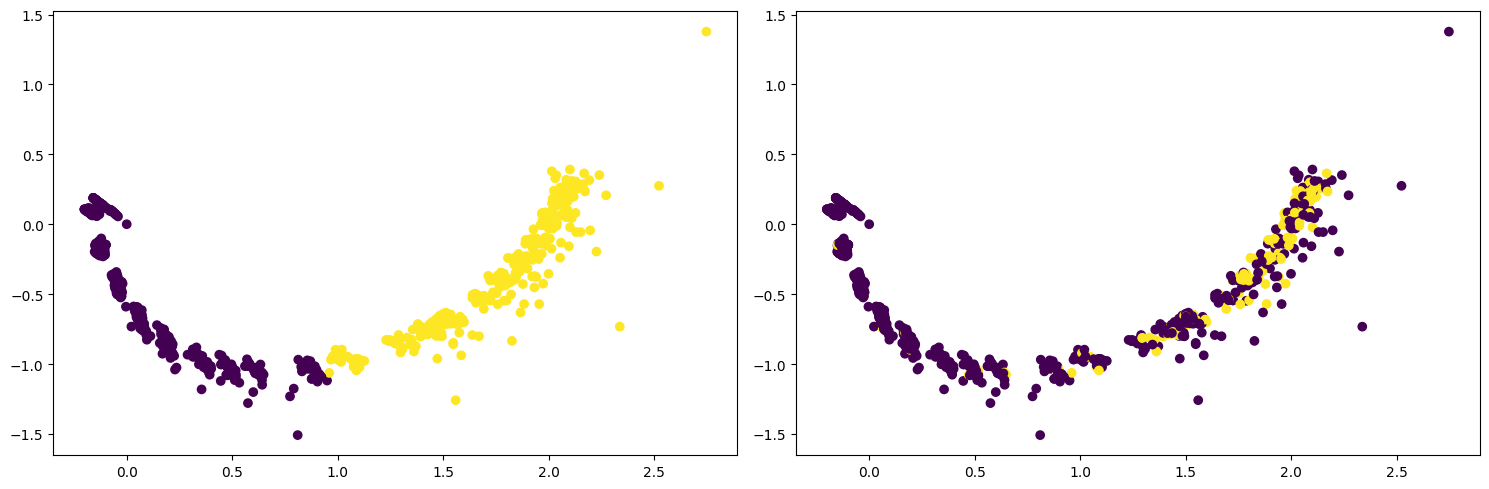

In [21]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x2[:, 0], x2[:, 1], c=clastinator2.predict(x2))
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x2[:, 0], x2[:, 1], c=df['spam'][:n].to_numpy())



In [22]:
rand_score(df['spam'][:n], clastinator2.predict(x2)), adjusted_rand_score(df['spam'][:n], clastinator2.predict(x2)), fowlkes_mallows_score(df['spam'][:n], clastinator2.predict(x2))

(0.6564564564564564, 0.2764729503444166, 0.7425489038529182)

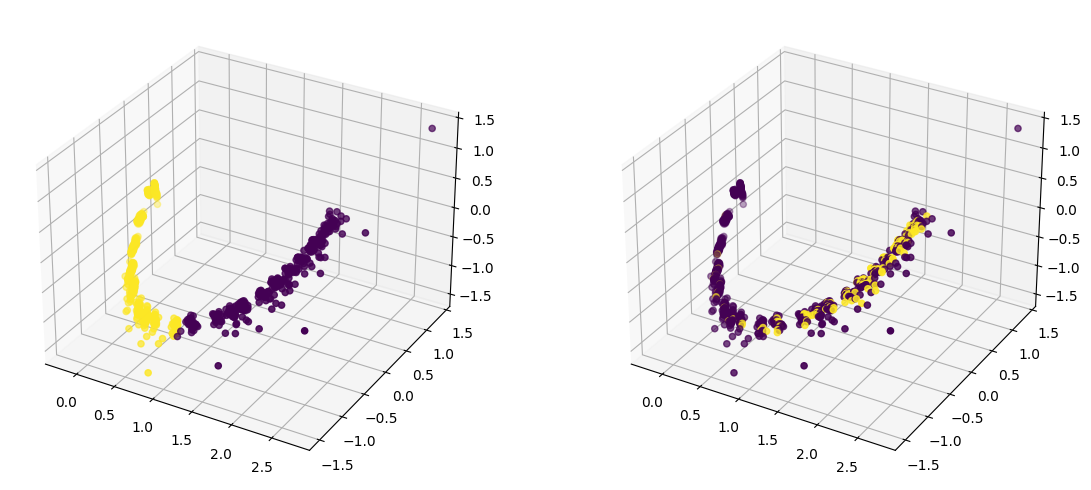

In [23]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=clastinator3.predict(x3))
ax = fig.add_subplot(gs[0, 1], projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 1], c=df['spam'][:n].to_numpy())


In [24]:
rand_score(df['spam'][:n], clastinator3.predict(x3)), adjusted_rand_score(df['spam'][:n], clastinator3.predict(x3)), fowlkes_mallows_score(df['spam'][:n], clastinator3.predict(x3))

(0.6553373373373373, 0.27459405983122104, 0.7416038517843041)